Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5155 - accuracy: 0.8104 - val_loss: 0.3683 - val_accuracy: 0.8636
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3345 - accuracy: 0.8775 - val_loss: 0.3219 - val_accuracy: 0.8845
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2859 - accuracy: 0.8939 - val_loss: 0.2921 - val_accuracy: 0.8935
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2543 - accuracy: 0.9060 - val_loss: 0.2782 - val_accuracy: 0.8980
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2296 - accuracy: 0.9154 - val_loss: 0.2764 - val_accuracy: 0.8988
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2084 - accuracy: 0.9214 - val_loss: 0.2583 - val_accuracy: 0.9075
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1890 - accuracy: 0.9288 - val_loss: 0.2484 - val_accuracy:

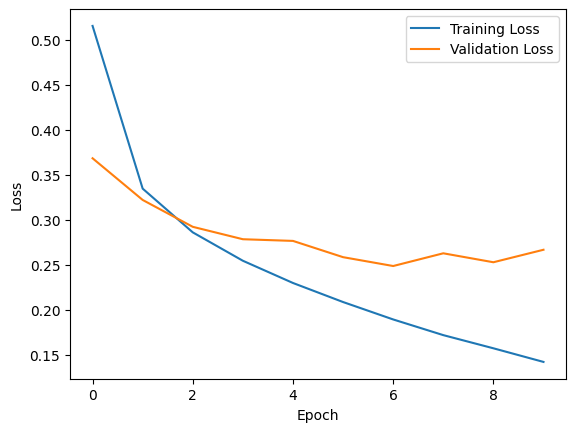

In [1]:
import tensorflow as tf
from tf_keras import datasets, layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST data
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess data (reshape and normalize)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)


cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=-1)
print("CNN Classification Report:")
print(classification_report(test_labels, cnn_predictions))




plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


C:\Users\Niteesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7732 - loss: 0.6534 - val_accuracy: 0.8469 - val_loss: 0.4413
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8617 - loss: 0.3832 - val_accuracy: 0.8589 - val_loss: 0.3850
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8735 - loss: 0.3467 - val_accuracy: 0.8699 - val_loss: 0.3553
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8822 - loss: 0.3178 - val_accuracy: 0.8704 - val_loss: 0.3519
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8907 - loss: 0.2957 - val_accuracy: 0.8802 - val_loss: 0.3345
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8956 - loss: 0.2793 - val_accuracy: 0.8773 - val_loss: 0.3467
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8971 - loss: 0.2782 - val_accuracy: 0.8878 - val_loss: 0.3166
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9047 - loss: 0.2586 - 

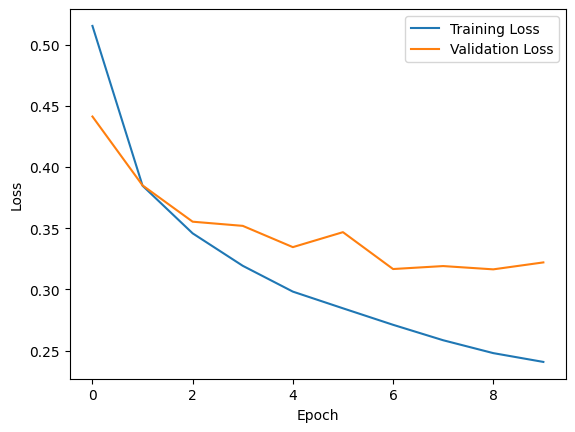

In [2]:

ann_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


ann_history = ann_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

ann_test_loss, ann_test_acc = ann_model.evaluate(test_images, test_labels)


ann_predictions = np.argmax(ann_model.predict(test_images), axis=-1)
print("ANN Classification Report:")
print(classification_report(test_labels, ann_predictions))


plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import numpy as np

fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=train_images.reshape((train_images.shape[0],28,28,1)).astype('float32')/255
test_images=test_images.reshape((test_images.shape[0],28,28,1)).astype('float32')/255

cnn_model=models.Sequential([
     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model, track training and validation loss
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

# Classification report for CNN
cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=-1)
print("CNN Classification Report:")
print(classification_report(test_labels, cnn_predictions))

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



